In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

# Considerações:

Na tabela Plantas temos os horários de quando foram produzidas cada uma das peças pelas máquinas, sendo representado pelo número 1.

Na tabela Soma temos a quantidade de peças produzidas por cada máquina a cada hora, no período de um dia.

Na tabela Paradas o número (1) representa que houve uma parada por um determinado tempo na máquina, e quando volta a (0) foi retomado o uso dessa máquina.

##**Dados Sensores - HORA**
Soma das peças geradas por máquina em intervalos de 1h no período de 1 dia

### Verificando dados

In [ ]:
dados_hora ='Dados_Sensores_Hora.xlsx'
df_dados_hora = pd.read_excel(dados_hora)

In [ ]:
df_dados_hora = df_dados_hora.fillna(0)
df_dados_hora.head()

,Date,soma-1x1 (injetora 13),soma-1x1 (Injetora 14),soma-1x1 (injetora 18),soma-1x1 (injetora 21),soma-1x1 (Injetora 22),soma-1x1 (injetora 23),soma-1x1 (injetora 10),soma-1x1 (Injetora 07),soma-1x1 (Injetora 08),...,soma-1x1 (injetora 02),soma-1x1 (injetora 11),soma-1x1 (Injetora 24),soma-1x1 (injetora 25),soma-1x1 (injetora 26),soma-1x1 (injetora 27),soma-1x1 (injetora 28),soma-1x1 (injetora 29),soma-1x1 (injetora 30),soma-1x1 (injetora 31)
0,2022-02-01 00:00:00,71,69,46,0.0,55.0,74,50.0,0.0,94.0,...,0.0,203,117,102,0.0,0.0,122,2,0.0,0.0
1,2022-02-01 01:00:00,72,72,44,0.0,55.0,75,0.0,0.0,94.0,...,0.0,218,117,102,0.0,0.0,118,34,0.0,0.0
2,2022-02-01 02:00:00,72,72,45,0.0,55.0,75,6.0,0.0,94.0,...,0.0,217,117,103,0.0,0.0,122,77,0.0,0.0
3,2022-02-01 03:00:00,65,71,45,0.0,56.0,72,0.0,0.0,94.0,...,0.0,199,117,102,0.0,0.0,122,79,0.0,0.0
4,2022-02-01 04:00:00,72,33,44,0.0,54.0,71,0.0,0.0,94.0,...,0.0,206,117,99,0.0,0.0,121,97,0.0,0.0


In [ ]:
df_dados_hora.dtypes

Date                       object
soma-1x1 (injetora 13)      int64
soma-1x1 (Injetora 14)      int64
soma-1x1 (injetora 18)      int64
soma-1x1 (injetora 21)    float64
soma-1x1 (Injetora 22)    float64
soma-1x1 (injetora 23)      int64
soma-1x1 (injetora 10)    float64
soma-1x1 (Injetora 07)    float64
soma-1x1 (Injetora 08)    float64
soma-1x1 (injetora 17)    float64
soma-1x1 (Injetora 09)      int64
soma-1x1 (injetora 19)    float64
soma-1x1 (Injetora 20)      int64
soma-1x1 (injetora 03)      int64
soma-1x1 (Injetora 15)      int64
soma-1x1 (injetora 01)    float64
soma-1x1 (Injetora 16)    float64
soma-1x1 (injetora 06)    float64
soma-1x1 (injetora 02)    float64
soma-1x1 (injetora 11)      int64
soma-1x1 (Injetora 24)      int64
soma-1x1 (injetora 25)      int64
soma-1x1 (injetora 26)    float64
soma-1x1 (injetora 27)    float64
soma-1x1 (injetora 28)      int64
soma-1x1 (injetora 29)      int64
soma-1x1 (injetora 30)    float64
soma-1x1 (injetora 31)    float64
dtype: object

### Ajustando o conteúdo e padronizando os nomes

In [ ]:
df_dados_hora.rename(columns=str.lower, inplace=True)

In [ ]:
for column in df_dados_hora:
  coluna = column.replace('soma-1x1 (', '')
  coluna = coluna.replace(')', '')
  df_dados_hora.rename({column: coluna}, axis=1, inplace=True)

In [ ]:
df_dados_hora = df_dados_hora.sort_index(axis=1, ascending=True)

In [ ]:
df_dados_hora.columns

Index(['date', 'injetora 01', 'injetora 02', 'injetora 03', 'injetora 06',
       'injetora 07', 'injetora 08', 'injetora 09', 'injetora 10',
       'injetora 11', 'injetora 13', 'injetora 14', 'injetora 15',
       'injetora 16', 'injetora 17', 'injetora 18', 'injetora 19',
       'injetora 20', 'injetora 21', 'injetora 22', 'injetora 23',
       'injetora 24', 'injetora 25', 'injetora 26', 'injetora 27',
       'injetora 28', 'injetora 29', 'injetora 30', 'injetora 31'],
      dtype='object')

In [ ]:
df_dados_hora.head()

,date,injetora 01,injetora 02,injetora 03,injetora 06,injetora 07,injetora 08,injetora 09,injetora 10,injetora 11,...,injetora 22,injetora 23,injetora 24,injetora 25,injetora 26,injetora 27,injetora 28,injetora 29,injetora 30,injetora 31
0,2022-02-01 00:00:00,0.0,0.0,99,0.0,0.0,94.0,149,50.0,203,...,55.0,74,117,102,0.0,0.0,122,2,0.0,0.0
1,2022-02-01 01:00:00,0.0,0.0,100,0.0,0.0,94.0,149,0.0,218,...,55.0,75,117,102,0.0,0.0,118,34,0.0,0.0
2,2022-02-01 02:00:00,0.0,0.0,93,0.0,0.0,94.0,149,6.0,217,...,55.0,75,117,103,0.0,0.0,122,77,0.0,0.0
3,2022-02-01 03:00:00,0.0,0.0,100,0.0,0.0,94.0,149,0.0,199,...,56.0,72,117,102,0.0,0.0,122,79,0.0,0.0
4,2022-02-01 04:00:00,0.0,0.0,87,0.0,0.0,94.0,149,0.0,206,...,54.0,71,117,99,0.0,0.0,121,97,0.0,0.0


### Transposição

Invertendo as colunas (transposição) para melhor manipulação dos dados

In [ ]:
df_hora_t = df_dados_hora

In [ ]:
df_hora_t.set_index('date', inplace=True)

In [ ]:
df_hora_t = df_dados_hora.transpose()

In [ ]:
df_hora_t.head()

date,2022-02-01 00:00:00,2022-02-01 01:00:00,2022-02-01 02:00:00,2022-02-01 03:00:00,2022-02-01 04:00:00,2022-02-01 05:00:00,2022-02-01 06:00:00,2022-02-01 07:00:00,2022-02-01 08:00:00,2022-02-01 09:00:00,...,2022-02-01 14:00:00,2022-02-01 15:00:00,2022-02-01 16:00:00,2022-02-01 17:00:00,2022-02-01 18:00:00,2022-02-01 19:00:00,2022-02-01 20:00:00,2022-02-01 21:00:00,2022-02-01 22:00:00,2022-02-01 23:00:00
injetora 01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
injetora 02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
injetora 03,99.0,100.0,93.0,100.0,87.0,100.0,99.0,95.0,100.0,100.0,...,98.0,101.0,102.0,99.0,102.0,98.0,102.0,101.0,94.0,102.0
injetora 06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
injetora 07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0


### Soma

Realizando a soma para obter o total de peças produzidas por cada máquina

In [ ]:
df_soma_pecas = df_hora_t.sum(axis=1)
df_soma_pecas = df_soma_pecas.reset_index()

In [ ]:
df_soma_pecas.columns = ['injetoras', 'pecas_dia']

In [ ]:
df_soma_pecas.sort_values(by='pecas_dia', ascending=False, inplace=True)
df_soma_pecas.reset_index(drop=True, inplace=True)

In [ ]:
df_soma_pecas

,injetoras,pecas_dia
0,injetora 11,5082.0
1,injetora 20,4699.0
2,injetora 09,3576.0
3,injetora 28,2905.0
4,injetora 24,2572.0
5,injetora 15,2540.0
6,injetora 25,2446.0
7,injetora 03,2354.0
8,injetora 29,2122.0
9,injetora 23,1743.0


### Verificando inatividade

Retirando as máquinas que não foram ativas no dia para criar os gráficos

In [ ]:
soma_pecas_filtrado = df_soma_pecas[df_soma_pecas['pecas_dia'] != 0]

In [ ]:
soma_pecas_filtrado = soma_pecas_filtrado.sort_values(by='pecas_dia')
soma_pecas_filtrado

,injetoras,pecas_dia
18,injetora 07,3.0
17,injetora 22,644.0
16,injetora 10,656.0
15,injetora 27,865.0
14,injetora 18,1055.0
13,injetora 17,1254.0
12,injetora 14,1639.0
11,injetora 13,1653.0
10,injetora 08,1659.0
9,injetora 23,1743.0


### Criação dos gráficos

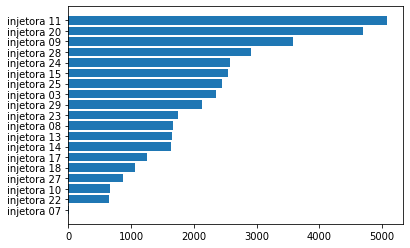

In [ ]:
plt.barh(soma_pecas_filtrado['injetoras'], soma_pecas_filtrado['pecas_dia'])
plt.show()

Com tantas máquinas a visualização dos gráficos torna-se um pouco poluída, então separaremos as 5 máquinas mais produtivas:

In [ ]:
lista_injetoras = df_soma_pecas.filter(items = [0, 1, 2, 3, 4], axis=0)

In [ ]:
lista_injetoras

,injetoras,pecas_dia
0,injetora 11,5082.0
1,injetora 20,4699.0
2,injetora 09,3576.0
3,injetora 28,2905.0
4,injetora 24,2572.0


Text(0.5, 1.0, 'Top 5 injetoras que mais produziram do dia')

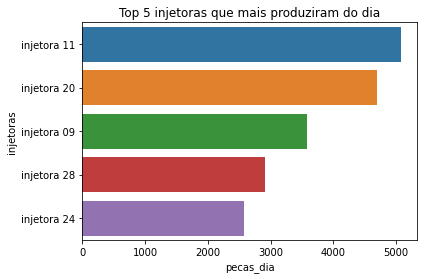

In [ ]:
sns.barplot(data=lista_injetoras, x='pecas_dia', y='injetoras').set_title('Top 5 injetoras que mais produziram do dia')

### Produção total

Verificando o total de peças produzidas pela empresa no dia

In [ ]:
soma = df_soma_pecas.sum(axis=0)
soma = soma.reset_index()
soma = soma.rename(columns={'index': 'Valor acumulado', 0: 'Produção total'})
soma = soma.drop(0)

In [ ]:
soma

,Valor acumulado,Produção total
1,pecas_dia,39467.0


### Verificando correlação

In [ ]:
df_dados_hora.fillna(0)

,injetora 01,injetora 02,injetora 03,injetora 06,injetora 07,injetora 08,injetora 09,injetora 10,injetora 11,injetora 13,...,injetora 22,injetora 23,injetora 24,injetora 25,injetora 26,injetora 27,injetora 28,injetora 29,injetora 30,injetora 31
date,,,,,,,,,,,,,,,,,,,,,
2022-02-01 00:00:00,0.0,0.0,99,0.0,0.0,94.0,149,50.0,203,71,...,55.0,74,117,102,0.0,0.0,122,2,0.0,0.0
2022-02-01 01:00:00,0.0,0.0,100,0.0,0.0,94.0,149,0.0,218,72,...,55.0,75,117,102,0.0,0.0,118,34,0.0,0.0
2022-02-01 02:00:00,0.0,0.0,93,0.0,0.0,94.0,149,6.0,217,72,...,55.0,75,117,103,0.0,0.0,122,77,0.0,0.0
2022-02-01 03:00:00,0.0,0.0,100,0.0,0.0,94.0,149,0.0,199,65,...,56.0,72,117,102,0.0,0.0,122,79,0.0,0.0
2022-02-01 04:00:00,0.0,0.0,87,0.0,0.0,94.0,149,0.0,206,72,...,54.0,71,117,99,0.0,0.0,121,97,0.0,0.0
2022-02-01 05:00:00,0.0,0.0,100,0.0,0.0,93.0,149,0.0,216,55,...,55.0,75,115,102,0.0,0.0,122,99,0.0,0.0
2022-02-01 06:00:00,0.0,0.0,99,0.0,0.0,94.0,149,0.0,216,73,...,55.0,75,117,102,0.0,0.0,122,88,0.0,0.0
2022-02-01 07:00:00,0.0,0.0,95,0.0,0.0,88.0,148,0.0,218,72,...,55.0,75,116,103,0.0,0.0,121,96,0.0,0.0
2022-02-01 08:00:00,0.0,0.0,100,0.0,0.0,90.0,149,4.0,221,72,...,55.0,53,117,102,0.0,0.0,122,97,0.0,0.0


In [ ]:
correlacao = df_dados_hora.corr()

In [ ]:
correlacao = correlacao.dropna(axis=1, how='all')
correlacao = correlacao.dropna(axis=0, how='all')
correlacao = correlacao.fillna(0)

In [ ]:
correlacao.head()

,injetora 03,injetora 07,injetora 08,injetora 09,injetora 10,injetora 11,injetora 13,injetora 14,injetora 15,injetora 17,injetora 18,injetora 20,injetora 22,injetora 23,injetora 24,injetora 25,injetora 27,injetora 28,injetora 29
injetora 03,1.000000e+00,0.263513,0.207768,1.489865e-16,0.310757,0.146645,0.199748,0.524734,0.060126,-0.234685,0.258638,-0.184725,-0.344799,-0.030179,-0.188248,6.336770e-01,0.412878,-0.154820,0.010094
injetora 07,2.635129e-01,1.000000,0.185658,0.000000e+00,0.476776,0.208947,0.053935,0.074718,0.160360,-0.219763,-0.437844,0.018155,-0.282817,0.089459,0.024940,2.487850e-02,0.367153,0.033115,0.133553
injetora 08,2.077677e-01,0.185658,1.000000,-1.994032e-01,0.422042,-0.159249,0.243668,-0.256782,-0.110564,0.485697,0.291960,-0.054397,0.179405,-0.204570,-0.216929,-5.512865e-03,0.284971,-0.200002,-0.195313
injetora 09,1.489865e-16,0.000000,-0.199403,1.000000e+00,0.068687,-0.010087,-0.048604,0.027826,0.038252,-0.154570,-0.025857,0.010518,-0.336583,-0.212354,-0.020227,-4.462766e-16,0.205849,0.057551,0.006397
injetora 10,3.107572e-01,0.476776,0.422042,6.868695e-02,1.000000,-0.245424,0.130941,0.049929,0.325023,-0.418560,-0.090645,0.105929,-0.583176,0.098455,-0.521903,-2.579350e-02,0.781511,-0.022108,0.061251


Correlação das máquinas que atuam de forma similar

In [ ]:
correlacao.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,injetora 03,injetora 07,injetora 08,injetora 09,injetora 10,injetora 11,injetora 13,injetora 14,injetora 15,injetora 17,injetora 18,injetora 20,injetora 22,injetora 23,injetora 24,injetora 25,injetora 27,injetora 28,injetora 29
injetora 03,1.00,0.26,0.21,0.00,0.31,0.15,0.20,0.52,0.06,-0.23,0.26,-0.18,-0.34,-0.03,-0.19,0.63,0.41,-0.15,0.01
injetora 07,0.26,1.00,0.19,0.00,0.48,0.21,0.05,0.07,0.16,-0.22,-0.44,0.02,-0.28,0.09,0.02,0.02,0.37,0.03,0.13
injetora 08,0.21,0.19,1.00,-0.20,0.42,-0.16,0.24,-0.26,-0.11,0.49,0.29,-0.05,0.18,-0.20,-0.22,-0.01,0.28,-0.20,-0.20
injetora 09,0.00,0.00,-0.20,1.00,0.07,-0.01,-0.05,0.03,0.04,-0.15,-0.03,0.01,-0.34,-0.21,-0.02,-0.00,0.21,0.06,0.01
injetora 10,0.31,0.48,0.42,0.07,1.00,-0.25,0.13,0.05,0.33,-0.42,-0.09,0.11,-0.58,0.10,-0.52,-0.03,0.78,-0.02,0.06
injetora 11,0.15,0.21,-0.16,-0.01,-0.25,1.00,-0.08,0.14,-0.22,0.08,-0.19,-0.23,0.02,0.04,0.09,0.30,-0.09,-0.21,0.15
injetora 13,0.20,0.05,0.24,-0.05,0.13,-0.08,1.00,-0.03,-0.18,0.09,0.58,0.48,-0.19,-0.14,0.00,0.30,0.14,-0.04,-0.07
injetora 14,0.52,0.07,-0.26,0.03,0.05,0.14,-0.03,1.00,0.12,-0.31,-0.04,0.09,-0.20,0.11,0.13,0.55,0.09,-0.05,-0.12
injetora 15,0.06,0.16,-0.11,0.04,0.33,-0.22,-0.18,0.12,1.00,-0.37,-0.07,-0.09,-0.36,0.17,-0.08,0.08,0.33,0.07,-0.07
injetora 17,-0.23,-0.22,0.49,-0.15,-0.42,0.08,0.09,-0.31,-0.37,1.00,0.28,-0.12,0.80,-0.10,0.26,-0.03,-0.63,0.08,-0.51


# Dados Sensores - Paradas


### Verificando dados

In [ ]:
df_dados_parada = pd.read_excel('Dados_Sensores_Parada.xlsx')

In [ ]:
df_dados_parada.head()

,Date,parada (injetora 13),parada (Injetora 14),parada (injetora 18),parada (injetora 23),parada (Injetora 22),parada (injetora 10),parada (Injetora 07),parada (Injetora 08),parada (injetora 17),...,parada (injetora 02),parada (injetora 11),parada (Injetora 24),parada (injetora 25),parada (injetora 26),parada (injetora 27),parada (injetora 28),parada (injetora 29),parada (injetora 30),parada (injetora 31)
0,2022-02-01 00:00:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01 00:02:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-01 00:12:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-01 00:12:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 00:21:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [ ]:
df_dados_parada.dtypes

Date                     object
parada (injetora 13)    float64
parada (Injetora 14)    float64
parada (injetora 18)    float64
parada (injetora 23)    float64
parada (Injetora 22)    float64
parada (injetora 10)    float64
parada (Injetora 07)    float64
parada (Injetora 08)    float64
parada (injetora 17)    float64
parada (Injetora 09)    float64
parada (injetora 19)    float64
parada (Injetora 20)    float64
parada (injetora 03)    float64
parada (Injetora 15)    float64
parada (injetora 01)    float64
parada (Injetora 16)    float64
parada (injetora 06)    float64
parada (injetora 02)    float64
parada (injetora 11)    float64
parada (Injetora 24)    float64
parada (injetora 25)    float64
parada (injetora 26)    float64
parada (injetora 27)    float64
parada (injetora 28)    float64
parada (injetora 29)    float64
parada (injetora 30)    float64
parada (injetora 31)    float64
dtype: object

In [ ]:
df_dados_parada = df_dados_parada.sort_index(axis=1, ascending=True)

### Padronizando nomes e corrigindo valores

In [ ]:
df_dados_parada.rename(columns=str.lower, inplace=True)

In [ ]:
for column in df_dados_parada:
  coluna = column.replace('parada (', '')
  coluna = coluna.replace(')', '')
  df_dados_parada.rename({column: coluna}, axis=1, inplace=True)

In [ ]:
df_dados_parada.columns

Index(['date', 'injetora 07', 'injetora 08', 'injetora 09', 'injetora 14',
       'injetora 15', 'injetora 16', 'injetora 20', 'injetora 22',
       'injetora 24', 'injetora 01', 'injetora 02', 'injetora 03',
       'injetora 06', 'injetora 10', 'injetora 11', 'injetora 13',
       'injetora 17', 'injetora 18', 'injetora 19', 'injetora 23',
       'injetora 25', 'injetora 26', 'injetora 27', 'injetora 28',
       'injetora 29', 'injetora 30', 'injetora 31'],
      dtype='object')

In [ ]:
df_dados_parada["date"] = pd.to_datetime(df_dados_parada["date"])

In [ ]:
dados_parada = df_dados_parada
dados_parada.set_index('date', inplace=True)

### Transposição

Transposição da tabela para manipulação dos dados

In [ ]:
dados_parada = df_dados_parada.transpose()

In [ ]:
dados_parada.head()

date,2022-02-01 00:00:07,2022-02-01 00:02:05,2022-02-01 00:12:57,2022-02-01 00:12:57,2022-02-01 00:21:56,2022-02-01 00:24:02,2022-02-01 00:29:23,2022-02-01 00:31:32,2022-02-01 00:31:33,2022-02-01 00:34:46,...,2022-02-01 22:05:52,2022-02-01 22:07:32,2022-02-01 22:29:33,2022-02-01 22:29:52,2022-02-01 22:46:48,2022-02-01 22:49:23,2022-02-01 22:59:03,2022-02-01 22:59:15,2022-02-01 23:54:51,2022-02-01 23:57:27
injetora 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injetora 08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injetora 09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injetora 14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injetora 15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Soma

Verificando a quantidade de paradas realizadas por cada máquina

In [ ]:
soma_paradas = dados_parada.sum(axis=1)
soma_paradas = soma_paradas.to_frame(name='num_paradas').reset_index()

In [ ]:
soma_paradas = soma_paradas.rename(columns={"index": "injetoras"})

In [ ]:
soma_paradas = soma_paradas.sort_values(by='injetoras')
soma_paradas

,injetoras,num_paradas
9,injetora 01,0.0
10,injetora 02,0.0
11,injetora 03,8.0
12,injetora 06,0.0
0,injetora 07,2.0
1,injetora 08,4.0
2,injetora 09,0.0
13,injetora 10,12.0
14,injetora 11,12.0
15,injetora 13,9.0


In [ ]:
top5_injetoras = soma_paradas.sort_values(by='num_paradas', ascending=False)
top5_injetoras = top5_injetoras.head().reset_index(drop=True)
top5_injetoras

,injetoras,num_paradas
0,injetora 18,19.0
1,injetora 29,15.0
2,injetora 10,12.0
3,injetora 11,12.0
4,injetora 15,11.0


Text(0.5, 1.0, '5 Máquinas que mais fizeram paradas')

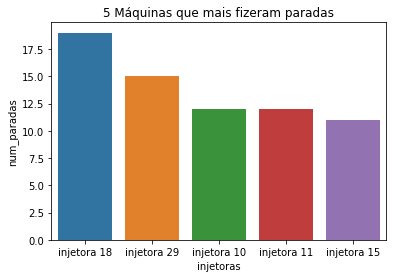

In [ ]:
sns.barplot(data=top5_injetoras, x='injetoras', y = 'num_paradas').set_title('5 Máquinas que mais fizeram paradas')

### Join das tabelas

Tendo o total de paradas e a quantidade de peças produzidas por cada máquina podemos fazer o join dessas tabelas para melhor manipulação e visualização das informações referentes à cada uma dessas máquinas:

In [ ]:
total_maquinas = pd.merge(df_soma_pecas, soma_paradas, how='inner')
total_maquinas

,injetoras,pecas_dia,num_paradas
0,injetora 11,5082.0,12.0
1,injetora 20,4699.0,4.0
2,injetora 09,3576.0,0.0
3,injetora 28,2905.0,2.0
4,injetora 24,2572.0,4.0
5,injetora 15,2540.0,11.0
6,injetora 25,2446.0,1.0
7,injetora 03,2354.0,8.0
8,injetora 29,2122.0,15.0
9,injetora 23,1743.0,11.0


### Verificando inatividade

Retirando as máquinas que não foram ativas para não impactar nas análises

In [ ]:
total_maquinas = total_maquinas.loc[(total_maquinas['pecas_dia'] != 0)]

In [ ]:
total_maquinas

,injetoras,pecas_dia,num_paradas
0,injetora 11,5082.0,12.0
1,injetora 20,4699.0,4.0
2,injetora 09,3576.0,0.0
3,injetora 28,2905.0,2.0
4,injetora 24,2572.0,4.0
5,injetora 15,2540.0,11.0
6,injetora 25,2446.0,1.0
7,injetora 03,2354.0,8.0
8,injetora 29,2122.0,15.0
9,injetora 23,1743.0,11.0


# Dados sensores - Plantas

### Injetoras ativas

Recebendo os nomes das injetoras para iteração futura desses itens

In [ ]:
lista_injetoras_total = []
for i in total_maquinas['injetoras']:
  lista_injetoras_total.append(i)

In [ ]:
lista_injetoras_total

['injetora 11',
 'injetora 20',
 'injetora 09',
 'injetora 28',
 'injetora 24',
 'injetora 15',
 'injetora 25',
 'injetora 03',
 'injetora 29',
 'injetora 23',
 'injetora 08',
 'injetora 13',
 'injetora 14',
 'injetora 17',
 'injetora 18',
 'injetora 27',
 'injetora 10',
 'injetora 22',
 'injetora 07']

### Carregando e verificando dados

In [ ]:
df_dados_plantas = pd.read_excel('Dados_Sensores_Plantas.xlsx')

In [ ]:
df_dados_plantas.head()

,Date,injecao (injetora 13),injecao (Injetora 14),injecao (injetora 18),injecao (Injetora 22),injecao (injetora 23),injecao (injetora 10),injecao (Injetora 07),injecao (Injetora 08),injecao (injetora 17),injecao (Injetora 09),injecao (Injetora 20),injecao (injetora 03),injecao (Injetora 15),injecao (injetora 11),injecao (Injetora 24),injecao (injetora 25),injecao (injetora 27),injecao (injetora 28),injecao (injetora 29)
0,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-01 00:00:01,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-01 00:00:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 00:00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dados_plantas.shape

(39453, 20)

### Alteração de valores e padronização dos nomes

In [ ]:
df_dados_plantas.rename(columns=str.lower, inplace=True)

In [ ]:
df_dados_plantas = df_dados_plantas.sort_index(axis=1, ascending=True)

In [ ]:
for column in df_dados_plantas:
  coluna = column.replace('injecao (', '')
  coluna = coluna.replace(')', '')
  df_dados_plantas.rename({column: coluna}, axis=1, inplace=True)

In [ ]:
df_dados_plantas.head()

,date,injetora 03,injetora 07,injetora 08,injetora 09,injetora 10,injetora 11,injetora 13,injetora 14,injetora 15,injetora 17,injetora 18,injetora 20,injetora 22,injetora 23,injetora 24,injetora 25,injetora 27,injetora 28,injetora 29
0,2022-02-01 00:00:00,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01 00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-01 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-01 00:00:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 00:00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_dados_plantas["date"] = pd.to_datetime(df_dados_plantas["date"])

In [ ]:
df_dados_plantas.dtypes

date           datetime64[ns]
injetora 03           float64
injetora 07           float64
injetora 08           float64
injetora 09           float64
injetora 10           float64
injetora 11           float64
injetora 13           float64
injetora 14           float64
injetora 15           float64
injetora 17           float64
injetora 18           float64
injetora 20           float64
injetora 22           float64
injetora 23           float64
injetora 24           float64
injetora 25           float64
injetora 27           float64
injetora 28           float64
injetora 29           float64
dtype: object

### Atribuindo cada sequência de peças produzidas para uma lista própria

In [ ]:
lista_series = []
n = 0
for i in lista_injetoras_total:
  injetora_unica = df_dados_plantas.filter(['date', lista_injetoras_total[n]], axis=1).dropna()
  df_time = pd.to_datetime(injetora_unica["date"])
  new_df_time = ((df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second).diff().dropna().astype(int)
  lista_series.append(new_df_time)
  n += 1

### Verificando a integridade dos dados

In [ ]:
len(lista_series[3])

2904

In [ ]:
lista_series[3].describe()

count    2904.000000
mean       29.737603
std         3.805197
min        27.000000
25%        29.000000
50%        30.000000
75%        30.000000
max       154.000000
Name: date, dtype: float64

### Adicionando os valores estatísticos em um DataFrame

In [ ]:
df_2 = pd.DataFrame()
n = 0
for i in lista_injetoras_total:
  df_3 = pd.DataFrame({lista_injetoras_total[n]: lista_series[n].describe()})
  df_3 = df_3.transpose().reset_index()
  df_2 = pd.concat([df_2, df_3], ignore_index=True)
  n += 1

In [ ]:
df_2 = df_2.rename(columns={'index': 'injetoras'})
df_2 = df_2.drop(columns='count')

### Adicionando os valores estatísticos na tabela com os outros valores

In [ ]:
maquinas = total_maquinas
total_maquinas = pd.merge(maquinas, df_2, how='inner')
total_maquinas.head()

,injetoras,pecas_dia,num_paradas,mean,std,min,25%,50%,75%,max
0,injetora 11,5082.0,12.0,16.983074,10.862042,0.0,16.0,16.0,17.0,360.0
1,injetora 20,4699.0,4.0,18.388463,12.464743,2.0,18.0,18.0,18.0,706.0
2,injetora 09,3576.0,0.0,24.164196,0.697469,22.0,24.0,24.0,24.0,49.0
3,injetora 28,2905.0,2.0,29.737603,3.805197,27.0,29.0,30.0,30.0,154.0
4,injetora 24,2572.0,4.0,33.593543,100.723492,2.0,30.0,31.0,31.0,5042.0


In [ ]:
total_maquinas = total_maquinas.rename(columns = {'mean':'mean_tempo_peca', 'std':'std_tempo_peca','min':'min_tempo_peca', 
                                                  '25%': 'qntl_25pct', '50%': 'median_tempo_peca', '75%':'qntl_75pct', 'max': 'max_tempo_peca'})
total_maquinas

,injetoras,pecas_dia,num_paradas,mean_tempo_peca,std_tempo_peca,min_tempo_peca,qntl_25pct,median_tempo_peca,qntl_75pct,max_tempo_peca
0,injetora 11,5082.0,12.0,16.983074,10.862042,0.0,16.0,16.0,17.0,360.0
1,injetora 20,4699.0,4.0,18.388463,12.464743,2.0,18.0,18.0,18.0,706.0
2,injetora 09,3576.0,0.0,24.164196,0.697469,22.0,24.0,24.0,24.0,49.0
3,injetora 28,2905.0,2.0,29.737603,3.805197,27.0,29.0,30.0,30.0,154.0
4,injetora 24,2572.0,4.0,33.593543,100.723492,2.0,30.0,31.0,31.0,5042.0
5,injetora 15,2540.0,11.0,34.018905,45.100112,10.0,31.0,31.0,32.0,2131.0
6,injetora 25,2446.0,1.0,35.311656,2.879787,32.0,35.0,35.0,35.0,149.0
7,injetora 03,2354.0,8.0,36.699958,14.989852,31.0,35.0,36.0,36.0,470.0
8,injetora 29,2122.0,15.0,40.106554,71.774042,0.0,36.0,37.0,37.0,2947.0
9,injetora 23,1743.0,11.0,49.550517,25.800042,41.0,48.0,48.0,48.0,716.0


In [ ]:
total_maquinas = total_maquinas.loc[total_maquinas['pecas_dia'] > 50]

In [ ]:
total_maquinas.tail()

,injetoras,pecas_dia,num_paradas,mean_tempo_peca,std_tempo_peca,min_tempo_peca,qntl_25pct,median_tempo_peca,qntl_75pct,max_tempo_peca
13,injetora 17,1254.0,2.0,25.455706,14.910617,20.0,25.0,25.0,25.0,548.0
14,injetora 18,1055.0,19.0,81.900380,34.036773,1.0,79.0,80.0,80.0,850.0
15,injetora 27,865.0,2.0,39.687500,19.218076,14.0,39.0,39.0,39.0,585.0
16,injetora 10,656.0,12.0,131.835115,1278.128548,1.0,39.0,40.0,40.0,24797.0
17,injetora 22,644.0,1.0,65.552100,3.173342,55.0,65.0,65.0,66.0,133.0


In [ ]:
total_maquinas.describe()

,pecas_dia,num_paradas,mean_tempo_peca,std_tempo_peca,min_tempo_peca,qntl_25pct,median_tempo_peca,qntl_75pct,max_tempo_peca
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2192.444444,6.833333,45.560069,124.945990,18.666667,38.166667,38.611111,38.833333,3558.888889
std,1264.755183,5.522681,27.127330,310.887777,17.809449,15.838338,15.960019,15.993565,7179.817849
min,644.000000,0.000000,16.983074,0.697469,0.000000,16.000000,16.000000,17.000000,49.000000
25%,1350.250000,2.000000,30.701588,11.262718,2.000000,29.250000,30.250000,30.250000,387.500000
50%,1932.500000,5.000000,38.193729,22.509059,17.000000,35.500000,36.500000,36.500000,711.000000
75%,2564.000000,11.000000,52.225390,55.269216,30.500000,45.750000,46.000000,46.000000,2319.250000
max,5082.000000,19.000000,131.835115,1278.128548,55.000000,79.000000,80.000000,80.000000,24797.000000


### Gráficos

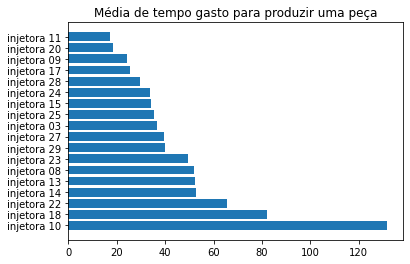

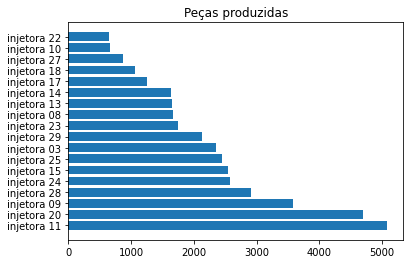

In [ ]:
plt.subplots()
total_maquinas = total_maquinas.sort_values(by='mean_tempo_peca', ascending=False)
plt.barh(total_maquinas['injetoras'], total_maquinas['mean_tempo_peca'])
plt.title("Média de tempo gasto para produzir uma peça")
plt.show()

plt.subplots()
total_maquinas = total_maquinas.sort_values(by='pecas_dia', ascending=False)
plt.barh(total_maquinas['injetoras'], total_maquinas['pecas_dia'])
plt.title("Peças produzidas")
plt.show()

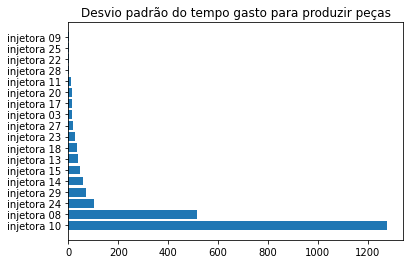

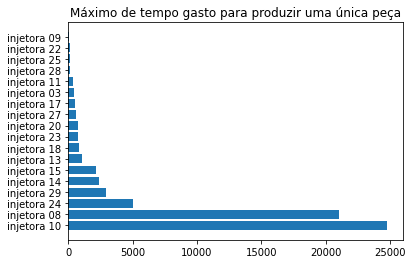

In [ ]:
plt.subplots()
total_maquinas = total_maquinas.sort_values(by='std_tempo_peca', ascending=False)
plt.barh(total_maquinas['injetoras'], total_maquinas['std_tempo_peca'])
plt.title("Desvio padrão do tempo gasto para produzir peças")
plt.show()

plt.subplots()
total_maquinas = total_maquinas.sort_values(by='max_tempo_peca', ascending=False)
plt.barh(total_maquinas['injetoras'], total_maquinas['max_tempo_peca'])
plt.title("Máximo de tempo gasto para produzir uma única peça")
plt.show()

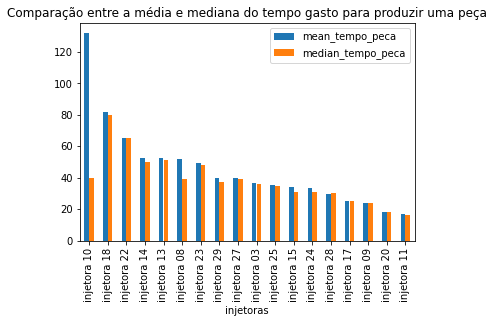

In [ ]:
total_maquinas = total_maquinas.sort_values(by='mean_tempo_peca', ascending=False)
total_maquinas.plot(x="injetoras", y=["mean_tempo_peca", "median_tempo_peca"], kind="bar")
plt.title("Comparação entre a média e mediana do tempo gasto para produzir uma peça")
plt.show()

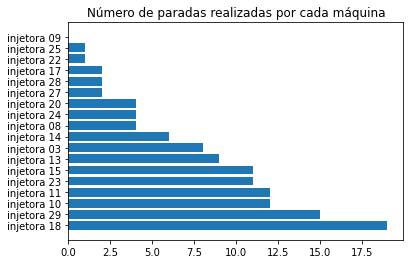

In [ ]:
total_maquinas = total_maquinas.sort_values(by='num_paradas', ascending=False)
plt.barh(total_maquinas['injetoras'], total_maquinas['num_paradas'])
plt.title("Número de paradas realizadas por cada máquina")
plt.show()

In [ ]:
df_dados_hora['injetora 10']

date
2022-02-01 00:00:00    50.0
2022-02-01 01:00:00     0.0
2022-02-01 02:00:00     6.0
2022-02-01 03:00:00     0.0
2022-02-01 04:00:00     0.0
2022-02-01 05:00:00     0.0
2022-02-01 06:00:00     0.0
2022-02-01 07:00:00     0.0
2022-02-01 08:00:00     4.0
2022-02-01 09:00:00     0.0
2022-02-01 10:00:00     0.0
2022-02-01 11:00:00     0.0
2022-02-01 12:00:00     0.0
2022-02-01 13:00:00     0.0
2022-02-01 14:00:00     0.0
2022-02-01 15:00:00     7.0
2022-02-01 16:00:00    16.0
2022-02-01 17:00:00    36.0
2022-02-01 18:00:00    92.0
2022-02-01 19:00:00    83.0
2022-02-01 20:00:00    91.0
2022-02-01 21:00:00    90.0
2022-02-01 22:00:00    91.0
2022-02-01 23:00:00    90.0
Name: injetora 10, dtype: float64

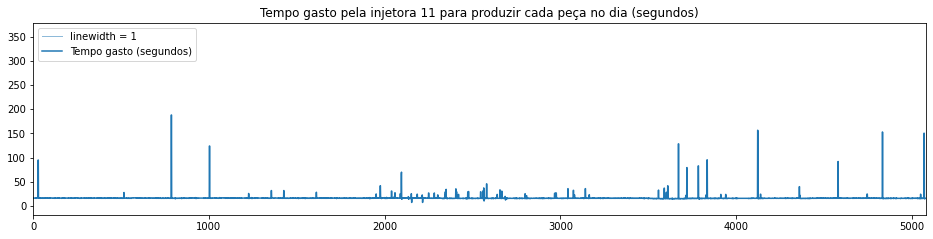

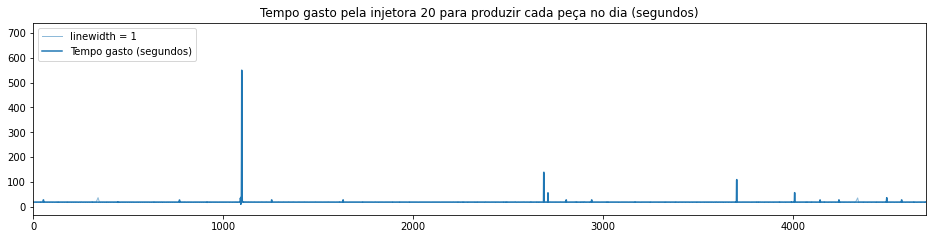

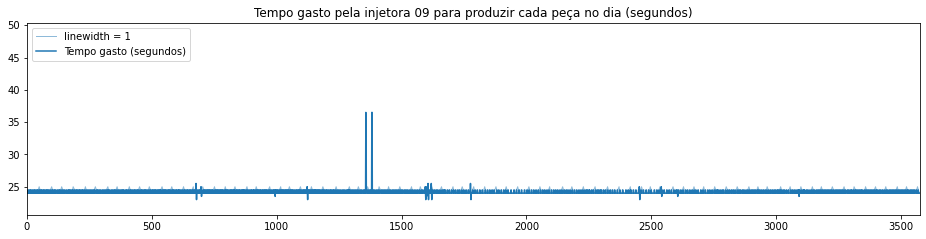

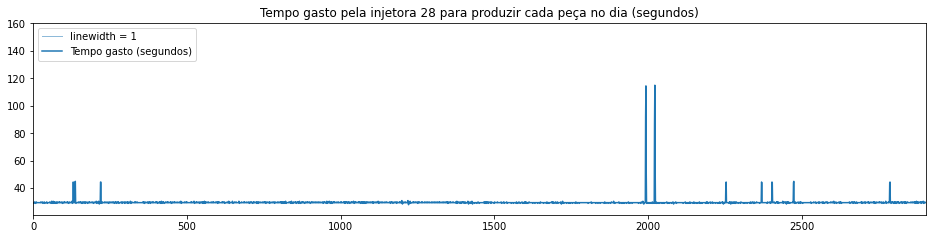

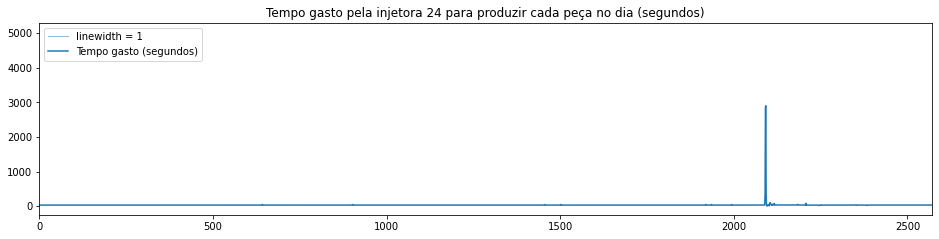

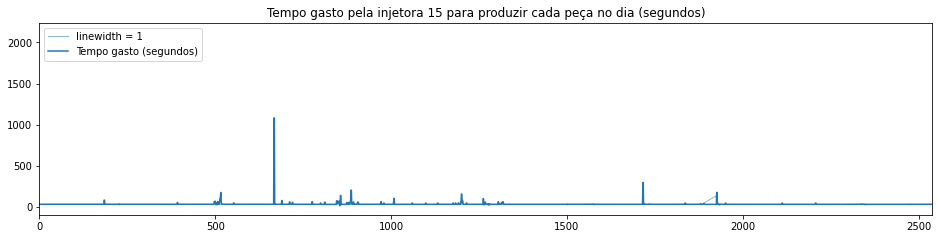

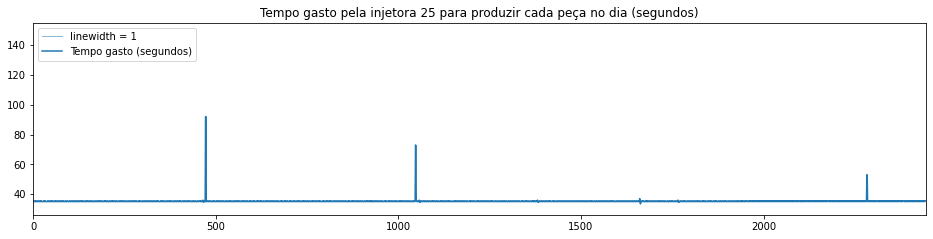

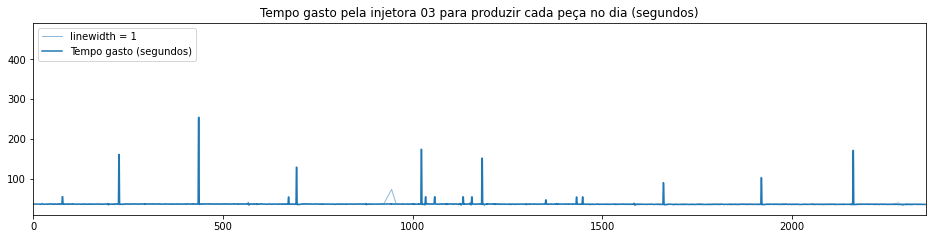

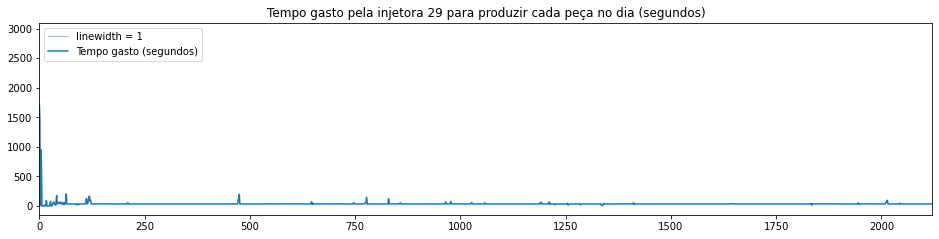

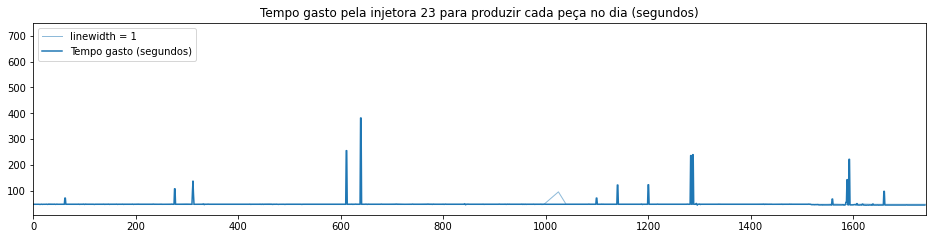

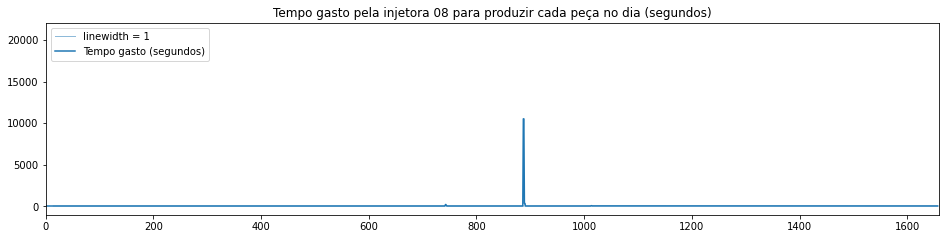

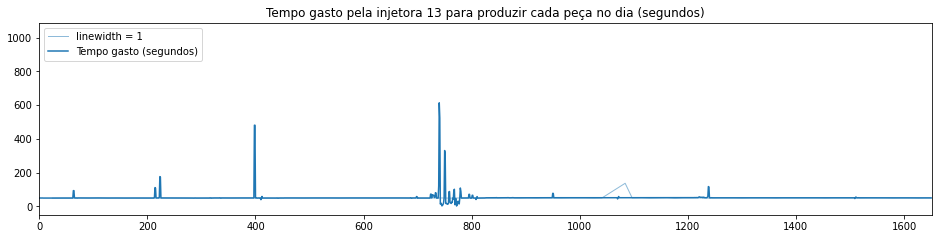

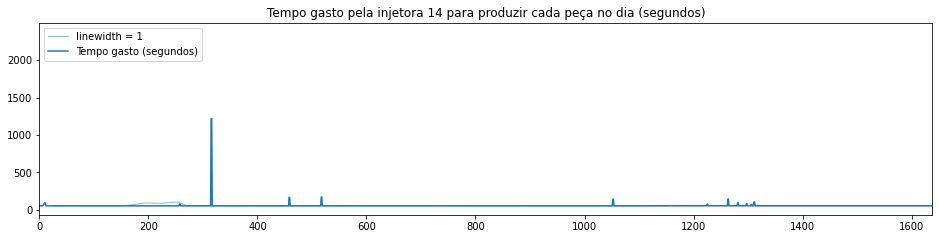

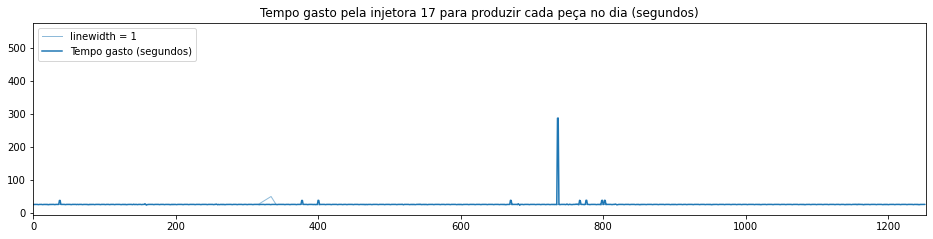

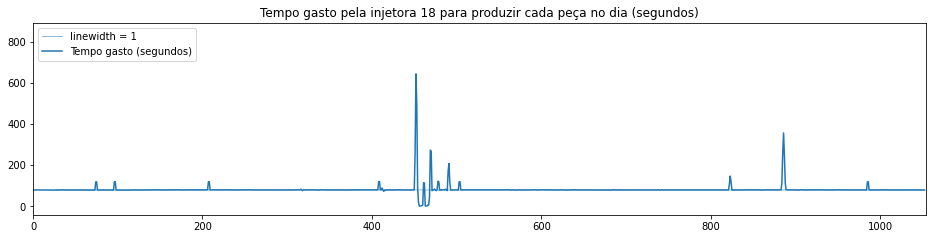

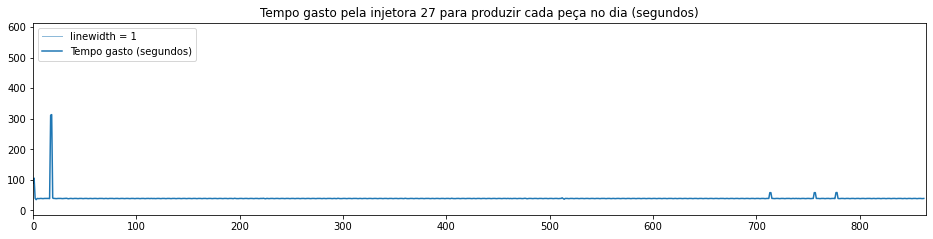

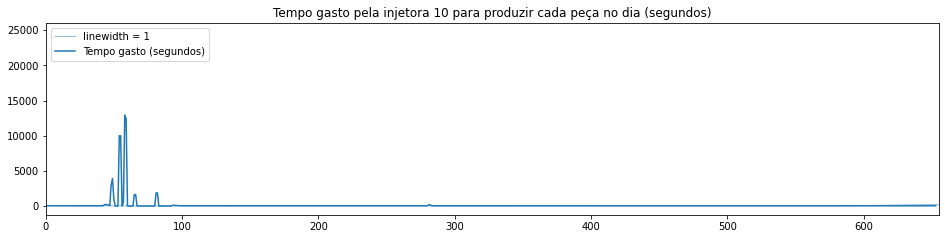

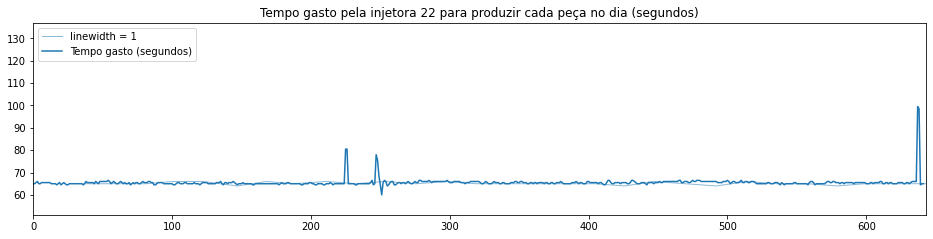

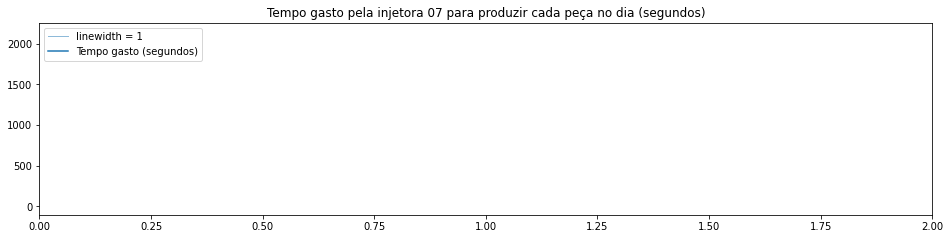

In [ ]:
def moving_avg(x, N=30):
    return np.convolve(x, np.ones((N,))/N, mode='valid')
n = 0
for i in lista_series:
  plt.figure(figsize = (16,12))
  plt.subplot(3,1,1)
  x = lista_series[n]
  plt.plot(x, linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
  plt.plot(moving_avg(x, 2), 'C0', label = 'Tempo gasto (segundos)')
  plt.xlim(0,len(x))
  plt.legend(loc=2)
  plt.title("Tempo gasto pela "+lista_injetoras_total[n]+" para produzir cada peça no dia (segundos)")
  plt.show()
  n += 1

Verificando quando ocorreu esse intervalo mais demorado na produção

In [ ]:
injetora_unica = df_dados_plantas.filter(['date', lista_injetoras_total[0]], axis=1).dropna()
injetora_unica

,date,injetora 11
23461,2022-02-01 00:01:37,1.0
23462,2022-02-01 00:01:54,1.0
23463,2022-02-01 00:02:10,1.0
23464,2022-02-01 00:02:27,1.0
23465,2022-02-01 00:02:44,1.0
...,...,...
28538,2022-02-01 23:58:44,1.0
28539,2022-02-01 23:59:00,1.0
28540,2022-02-01 23:59:16,1.0
28541,2022-02-01 23:59:32,1.0


In [ ]:
df_time = pd.to_datetime(injetora_unica["date"])
new_df_time = ((df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second).diff()
df_tempo_dif = new_df_time.to_frame()

In [ ]:
injetora_unica.insert(2, "Tempo producao", df_tempo_dif, True)

In [ ]:
injetora_unica

,date,injetora 11,Tempo producao
23461,2022-02-01 00:01:37,1.0,NaN
23462,2022-02-01 00:01:54,1.0,17.0
23463,2022-02-01 00:02:10,1.0,16.0
23464,2022-02-01 00:02:27,1.0,17.0
23465,2022-02-01 00:02:44,1.0,17.0
...,...,...,...
28538,2022-02-01 23:58:44,1.0,15.0
28539,2022-02-01 23:59:00,1.0,16.0
28540,2022-02-01 23:59:16,1.0,16.0
28541,2022-02-01 23:59:32,1.0,16.0


In [ ]:
injetora_unica.loc[injetora_unica['Tempo producao'] == injetora_unica['Tempo producao'].max()]

,date,injetora 11,Tempo producao
24249,2022-02-01 03:46:53,1.0,360.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


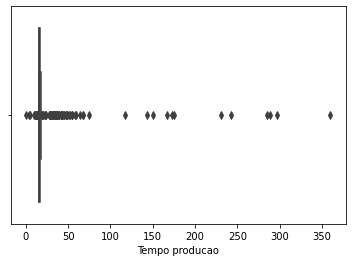

In [ ]:
sns.boxplot(injetora_unica['Tempo producao'])